# Learning Tree Model

In [2]:
#Import the sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [20]:
# Load Data and show the description
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
# Cross-validation
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state = 42)

C:\Users\AdamChang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Training the model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [7]:
#print the score of model
print('Accuracy of training set:', tree.score(xtrain, ytrain))
print('Accuracy of testing set:', tree.score(xtest, ytest))

Accuracy of training set: 1.0
Accuracy of testing set: 0.93006993007


# Tree Pruning

In [27]:
#Agjusting the max_depth
tree2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree2.fit(xtrain, ytrain)
print('Accuracy of training set:', tree2.score(xtrain, ytrain))
print('Accuracy of testing set:', tree2.score(xtest, ytest))

Accuracy of training set: 0.971830985915
Accuracy of testing set: 0.958041958042


In [9]:
tree2.feature_importances_

array([ 0.        ,  0.02649864,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.70898365,  0.        ,  0.        ,
        0.01301136,  0.        ,  0.        ,  0.        ,  0.00158373,
        0.00683271,  0.        ,  0.01734457,  0.        ,  0.        ,
        0.06009867,  0.09115461,  0.02928303,  0.0351676 ,  0.01004143,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# Visualization the feature importance

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
sns.set(style="white", color_codes=True)

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x1dbed75f978>,
 <a list of 30 Text xticklabel objects>)

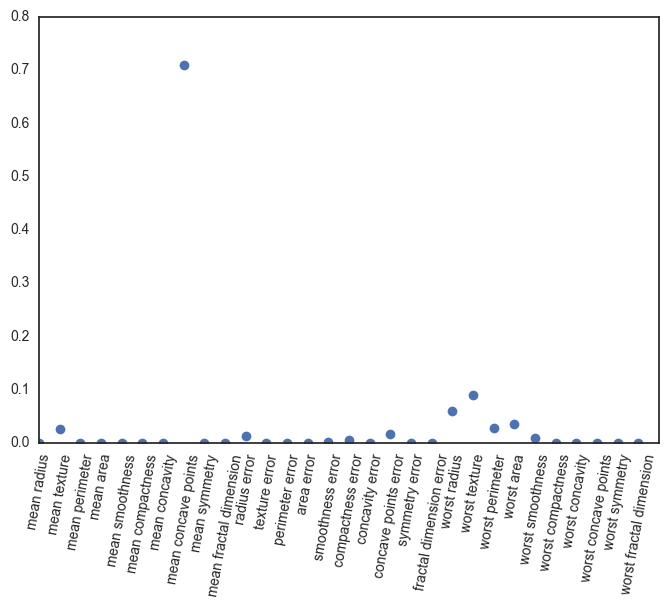

In [17]:
# Visualize the feature importance
plt.plot(tree2.feature_importances_,'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=80)

In [18]:
import pydotplus
from sklearn.tree import export_graphviz

In [19]:
#output and visualize the decision tree in pdf
dot_data = export_graphviz(tree2, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('cancer.pdf')

True

# Move to Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest = RandomForestClassifier(n_estimators=50, random_state=0)

In [34]:
forest.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [37]:
print('Accuracy of training set:', forest.score(xtrain, ytrain))
print('Accuracy of testing set:', forest.score(xtest, ytest))

Accuracy of training set: 1.0
Accuracy of testing set: 0.965034965035


([<matplotlib.axis.XTick at 0x1dbf1b905c0>,
 <a list of 30 Text xticklabel objects>)

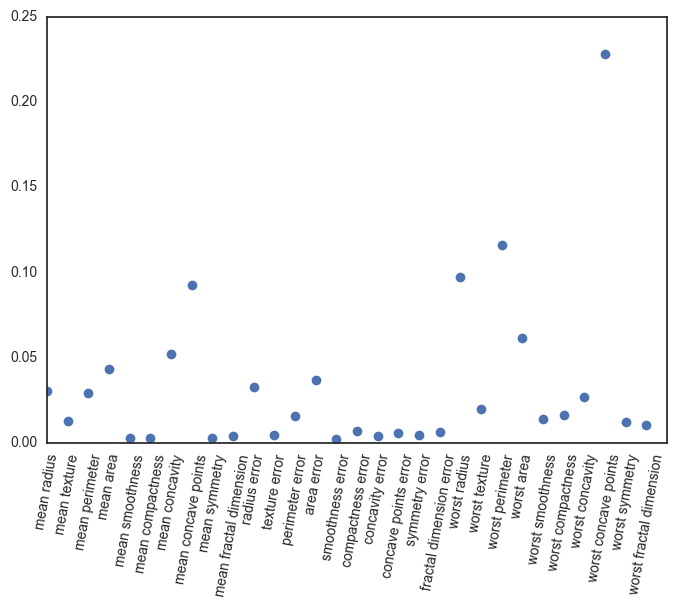

In [35]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 80)

# Conclusion

Decision tree is a very useful method in classification algorithm.  
We can see random forest is trying to make more tree to balance the multiple tree.  
There have more possible to find a better model and reduce the overfitting, but also need more time to training.  